In [1]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from tensorflow import keras

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
models = [
    ['Fire-64x64-color-v7-soft-benchmark', 'Model/Fire-64x64-color-v7-soft-benchmark.h5', 64],
    ['Fire-32x32-CNN-v1', 'Model/v1.0/Fire-32x32-CNN-v1.h5', 32],
    ['Fire-64x64-CNN-v1', 'Model/v1.0/Fire-64x64-CNN-v1.h5', 64],
    ['Fire-128x128-CNN-v1', 'Model/v1.0/Fire-128x128-CNN-v1.h5', 128],
    ['Fire-32x32-CNN-v2', 'Model/v2.0/Fire-32x32-CNN-v2.h5', 32],
    ['Fire-64x64-CNN-v2', 'Model/v2.0/Fire-64x64-CNN-v2.h5', 64],
    ['Fire-128x128-CNN-v2', 'Model/v2.0/Fire-128x128-CNN-v2.h5', 128]
]

In [3]:
DATADIR = 'Datasets/Test/'
CATEGORIES = ['Fire', 'NoFire']

In [4]:
def get_testing_data(img_size):
    testing_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                print('ERROR: ', e)
    return testing_data

In [5]:
def get_model_performances():
    performances = []
    
    for name, path, d in models:
        print('current model: ', name, path, d)
        
        metrics = {}
        
        metrics['model'] = name
        
        model = keras.models.load_model(path)
        
        data = get_testing_data(d)
        
        X, y = [], []
        
        for features, label in data:
            X.append(features)
            y.append(label)
        
        X = np.array(X).reshape(-1, d, d, 3)
        X = X / 255.0
        
        y_pred = model.predict_classes(X)
        
        cm = confusion_matrix(y, y_pred)
        metrics["false_positive"] = cm[1][0]
        metrics["false_negative"] = cm[0][1]
        metrics["accuracy"] = accuracy_score(y, y_pred)
        metrics["precision"] = precision_score(y, y_pred)
        metrics["recall"] = recall_score(y, y_pred)
        metrics["f1_score"] = f1_score(y, y_pred)
        
        performances.append(metrics)
        
    return pd.DataFrame(performances)

In [6]:
perform_df = get_model_performances()

W1213 19:57:47.972647 139693740820288 deprecation.py:506] From /home/hssahrul/miniconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1213 19:57:47.974165 139693740820288 deprecation.py:506] From /home/hssahrul/miniconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1213 19:57:47.975557 139693740820288 deprecation.py:506] From /home/hssahrul/miniconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: c

current model:  Fire-64x64-color-v7-soft-benchmark Model/Fire-64x64-color-v7-soft-benchmark.h5 64


100%|██████████| 278/278 [00:05<00:00, 51.20it/s]


current model:  Fire-32x32-CNN-v1 Model/v1.0/Fire-32x32-CNN-v1.h5 32


100%|██████████| 278/278 [00:05<00:00, 49.62it/s]


current model:  Fire-64x64-CNN-v1 Model/v1.0/Fire-64x64-CNN-v1.h5 64


100%|██████████| 278/278 [00:05<00:00, 50.90it/s]


current model:  Fire-128x128-CNN-v1 Model/v1.0/Fire-128x128-CNN-v1.h5 128


100%|██████████| 278/278 [00:05<00:00, 49.19it/s]


current model:  Fire-32x32-CNN-v2 Model/v2.0/Fire-32x32-CNN-v2.h5 32


100%|██████████| 278/278 [00:05<00:00, 54.00it/s]


current model:  Fire-64x64-CNN-v2 Model/v2.0/Fire-64x64-CNN-v2.h5 64


100%|██████████| 278/278 [00:05<00:00, 47.38it/s]


current model:  Fire-128x128-CNN-v2 Model/v2.0/Fire-128x128-CNN-v2.h5 128


100%|██████████| 278/278 [00:05<00:00, 47.72it/s]


In [7]:
perform_df = perform_df[['model', 'accuracy', 'false_positive', 'false_negative', 'recall', 'precision', 'f1_score']]
perform_df.sort_values(['f1_score'], ascending=[0])

,model,accuracy,false_positive,false_negative,recall,precision,f1_score
0,Fire-64x64-color-v7-soft-benchmark,0.939150,17,36,0.938849,0.878788,0.907826
6,Fire-128x128-CNN-v2,0.900115,14,73,0.949640,0.783383,0.858537
4,Fire-32x32-CNN-v2,0.896670,19,71,0.931655,0.784848,0.851974
2,Fire-64x64-CNN-v1,0.916188,68,5,0.755396,0.976744,0.851927
3,Fire-128x128-CNN-v1,0.887486,44,54,0.841727,0.812500,0.826855
1,Fire-32x32-CNN-v1,0.863375,63,56,0.773381,0.793358,0.783242
5,Fire-64x64-CNN-v2,0.764638,28,177,0.899281,0.585480,0.709220


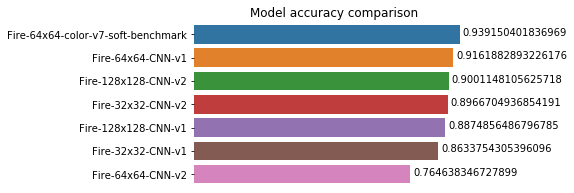

In [43]:
df = perform_df[['model', 'accuracy']].sort_values(['accuracy'], ascending=[0])

f, ax = plt.subplots(figsize=(5, 3))
ax = sns.barplot(x="accuracy", y="model", data=df)
ax.xaxis.label.set_visible(False)
for i, v in enumerate(df['accuracy'].values.tolist()):
    ax.text(v+0.01, i+.05, str(v), color='black')
plt.title(f'Model accuracy comparison')
plt.xticks([])
plt.ylabel("")
plt.box(False)

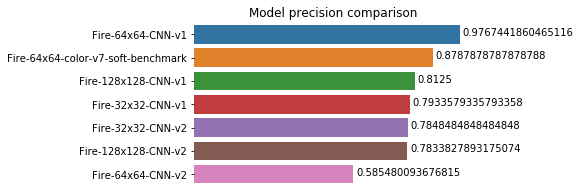

In [44]:
df = perform_df[['model', 'precision']].sort_values(['precision'], ascending=[0])

f, ax = plt.subplots(figsize=(5, 3))
ax = sns.barplot(x="precision", y="model", data=df)
ax.xaxis.label.set_visible(False)
for i, v in enumerate(df['precision'].values.tolist()):
    ax.text(v+0.01, i+.05, str(v), color='black')
plt.title(f'Model precision comparison')
plt.xticks([])
plt.ylabel("")
plt.box(False)

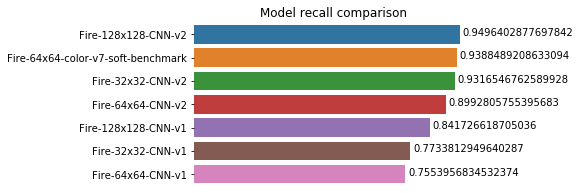

In [45]:
df = perform_df[['model', 'recall']].sort_values(['recall'], ascending=[0])

f, ax = plt.subplots(figsize=(5, 3))
ax = sns.barplot(x="recall", y="model", data=df)
ax.xaxis.label.set_visible(False)
for i, v in enumerate(df['recall'].values.tolist()):
    ax.text(v+0.01, i+.05, str(v), color='black')
plt.title(f'Model recall comparison')
plt.xticks([])
plt.ylabel("")
plt.box(False)

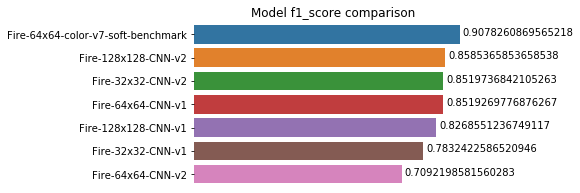

In [47]:
df = perform_df[['model', 'f1_score']].sort_values(['f1_score'], ascending=[0])

f, ax = plt.subplots(figsize=(5, 3))
ax = sns.barplot(x="f1_score", y="model", data=df)
ax.xaxis.label.set_visible(False)
for i, v in enumerate(df['f1_score'].values.tolist()):
    ax.text(v+0.01, i+.05, str(v), color='black')
plt.title(f'Model f1_score comparison')
plt.xticks([])
plt.ylabel("")
plt.box(False)